# **Bike Sharing Analysis**

Dataset : Bike Sharing Dataset ([Source](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset))

Problem Statement :
1. How do holidays affect the total number of bicycle users (cnt)?
2. What is the average and distribution of the number of bicycle users (casual and registered) during peak hours (morning: 7–9, afternoon: 17–19)?
3. Do weather conditions (weathersit) affect the number of bicycle users (cnt)?
4. How does bicycle use (cnt) compare between different seasons?
5. How bicycle usage trends changed from 2011 to 2012?

# **1. Library Import**

*Library* [`pandas`](https://pandas.pydata.org) to carry out processing, analysis and manipulation of data.

*Library* [`matplotlib`](https://matplotlib.org/) to do visualization.

*Library* [`seaborn`](https://seaborn.pydata.org/) to drawing attractive and informative statistical graphics.

*Library* [`ZipFile`](https://docs.python.org/3/library/zipfile.html) to extract zip file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import numpy as np

# *2. Data Wrangling*

## *2.1 Gathering Data*

In [12]:
with ZipFile("Bike-sharing-dataset.zip", 'r') as zipObj:
    zipObj.extractall()

In [10]:
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')
data_day, data_hour

(     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0          1  2011-01-01       1   0     1        0        6           0   
 1          2  2011-01-02       1   0     1        0        0           0   
 2          3  2011-01-03       1   0     1        0        1           1   
 3          4  2011-01-04       1   0     1        0        2           1   
 4          5  2011-01-05       1   0     1        0        3           1   
 ..       ...         ...     ...  ..   ...      ...      ...         ...   
 726      727  2012-12-27       1   1    12        0        4           1   
 727      728  2012-12-28       1   1    12        0        5           1   
 728      729  2012-12-29       1   1    12        0        6           0   
 729      730  2012-12-30       1   1    12        0        0           0   
 730      731  2012-12-31       1   1    12        0        1           1   
 
      weathersit      temp     atemp       hum  windspeed  casual  registe

There are 2 files resulting from zipfile extraction, namely day.csv and hour.csv. For day.csv data, there are 731 rows and 16 columns. For hour.csv data, there are 17379 rows and 17 columns. Attribute information can be accessed via the [Readme.txt](Readme.txt) file

## *2.2 Assessing Data*

In [11]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print(data_day.duplicated().sum())

0


In [14]:
print(data_hour.duplicated().sum())

0


In [15]:
def outlier_check(data):
    outlier = {}
    for column in data.select_dtypes(include=np.number).columns:
        if column == 'holiday':
            continue
        q25 , q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
        iqr = q75 - q25
        lower_outlier = q25 - 1.5 * iqr
        high_outlier = q75 + 1.5 * iqr
        outliers = data[(data[column] < lower_outlier) | (data[column] > high_outlier)][column]
        outlier[column] = len(outliers)
    total = sum(outlier.values())
    return outlier, total

day_outlier, total_day = outlier_check(data_day)
hour_outlier, total_hour = outlier_check(data_hour)
print(f"Total outlier in day data: {total_day}")
print(f"Total outlier in hour data: {total_hour}")
day_outlier, hour_outlier

Total outlier in day data: 59
Total outlier in hour data: 2744


({'instant': 0,
  'season': 0,
  'yr': 0,
  'mnth': 0,
  'weekday': 0,
  'workingday': 0,
  'weathersit': 0,
  'temp': 0,
  'atemp': 0,
  'hum': 2,
  'windspeed': 13,
  'casual': 44,
  'registered': 0,
  'cnt': 0},
 {'instant': 0,
  'season': 0,
  'yr': 0,
  'mnth': 0,
  'hr': 0,
  'weekday': 0,
  'workingday': 0,
  'weathersit': 3,
  'temp': 0,
  'atemp': 0,
  'hum': 22,
  'windspeed': 342,
  'casual': 1192,
  'registered': 680,
  'cnt': 505})

1. day.csv and hour.csv Data don't have any null value.
2. day.csv and hour.csv Data don't have any duplicate value.
3. day.csv data has 59 outliers and hour.csv data has 2744 outliers.

## *2.3 Cleaning Data*

In [9]:
def remove_outliers(data):
    row_remove = set()
    for column in data.select_dtypes(include=np.number).columns:
        if column == 'holiday':
            continue
        q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
        iqr = q75 - q25
        lower_outlier = q25 - 1.5 * iqr
        high_outlier = q75 + 1.5 * iqr
        outlier = data[(data[column] < lower_outlier) | (data[column] > high_outlier)].index
        row_remove.update(outlier)
    cleaned_data = data.drop(index=row_remove)
    return cleaned_data

def print_outlier_summary(data, cleaned_data, dataset_name):
    rows_before = len(data)
    rows_after = len(cleaned_data)
    rows_removed = rows_before - rows_after
    print(f"Dataset: {dataset_name}")
    print(f"Number of rows before cleanup: {rows_before}")
    print(f"Number of rows deleted (containing outliers): {rows_removed}")
    print(f"Number of rows after cleanup: {rows_after}")
    print("-" * 50)

data_day_cleaned = remove_outliers(data_day)
data_hour_cleaned = remove_outliers(data_hour)
print_outlier_summary(data_day, data_day_cleaned, "day.csv")
print_outlier_summary(data_hour, data_hour_cleaned, "hour.csv")

Dataset: day.csv
Number of rows before cleanup: 731
Number of rows deleted (containing outliers): 58
Number of rows after cleanup: 673
--------------------------------------------------
Dataset: hour.csv
Number of rows before cleanup: 17379
Number of rows deleted (containing outliers): 2162
Number of rows after cleanup: 15217
--------------------------------------------------


From the initial check on the day.csv data, there were 59 outliers and when the outliers were cleaned, there were 58 rows that had been removed from the data, this was because there was a possibility that in 1 row there were 2 or 3 outlier columns. While for the hour.csv data, there were 2162 outliers that had been removed from the data.

# **3. Exploratory Data Analysis**

Exploratory Data Analysis is the stage of exploring data that has been cleaned to gain insight and answer analysis questions.

In [16]:
data_day, data_hour

(         dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
 0    2011-01-01       1   0     1        0        6           0           2   
 1    2011-01-02       1   0     1        0        0           0           2   
 2    2011-01-03       1   0     1        0        1           1           1   
 3    2011-01-04       1   0     1        0        2           1           1   
 4    2011-01-05       1   0     1        0        3           1           1   
 ..          ...     ...  ..   ...      ...      ...         ...         ...   
 726  2012-12-27       1   1    12        0        4           1           2   
 727  2012-12-28       1   1    12        0        5           1           2   
 728  2012-12-29       1   1    12        0        6           0           2   
 729  2012-12-30       1   1    12        0        0           0           1   
 730  2012-12-31       1   1    12        0        1           1           2   
 
          temp     atemp       hum  wi

In [17]:
data_day.info()
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Coun

In [18]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

Because the data type in the 'dteday' column is still an object type, it must be converted to datetime.

In [19]:
data_day.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [4]:
data_hour = pd.read_csv('hour.csv')
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000
mean,8689.500058,2.501554,0.502532,6.537457,11.546087,0.028769,3.003855,0.682681,1.425489,0.496972,0.475764,0.627239,0.190087,35.674338,153.778769,189.453107
std,5017.318075,1.106945,0.500008,3.438933,6.914761,0.167161,2.005843,0.465446,0.639913,0.192560,0.171851,0.192929,0.122345,49.304235,151.356699,181.387153
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<Axes: >

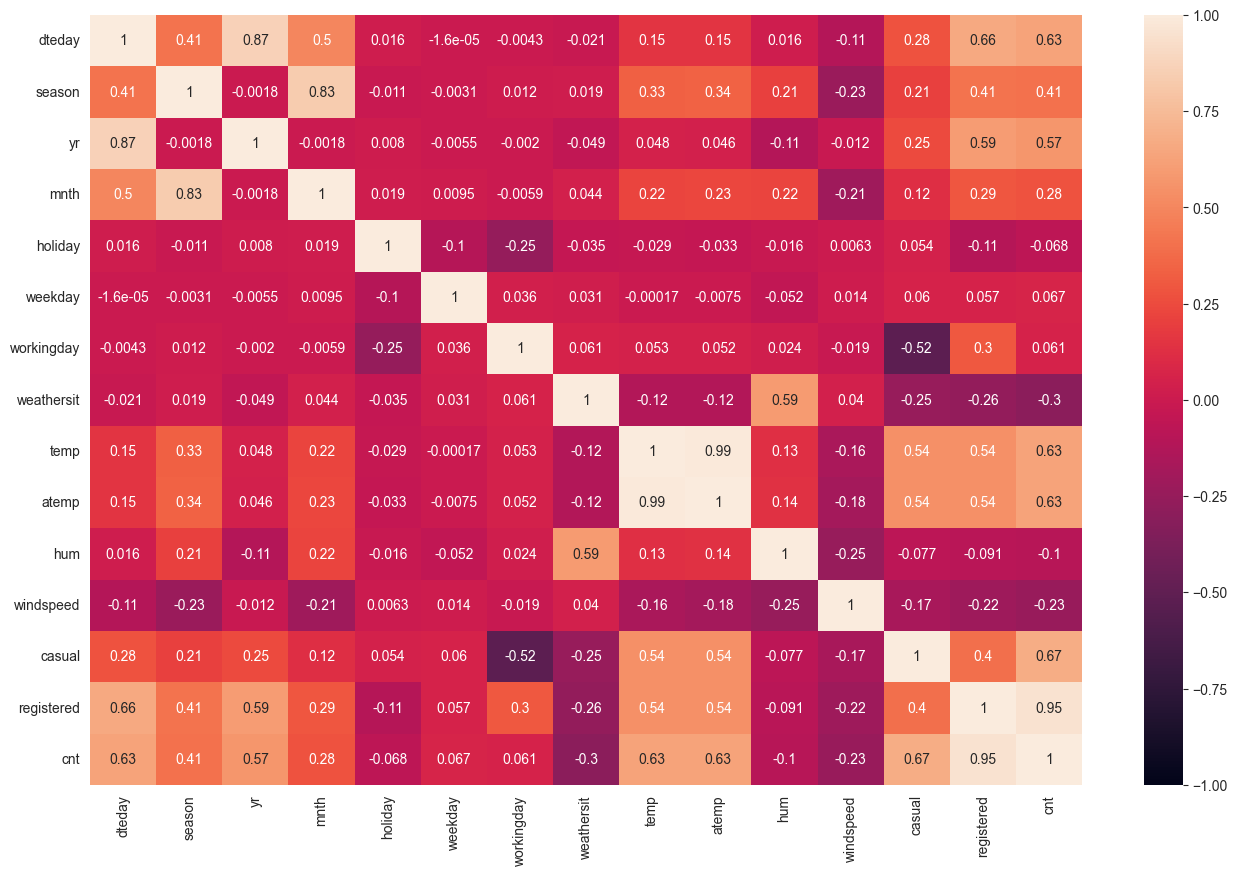

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_day.corr(), vmin = -1, vmax = 1, annot=True)

<Axes: >

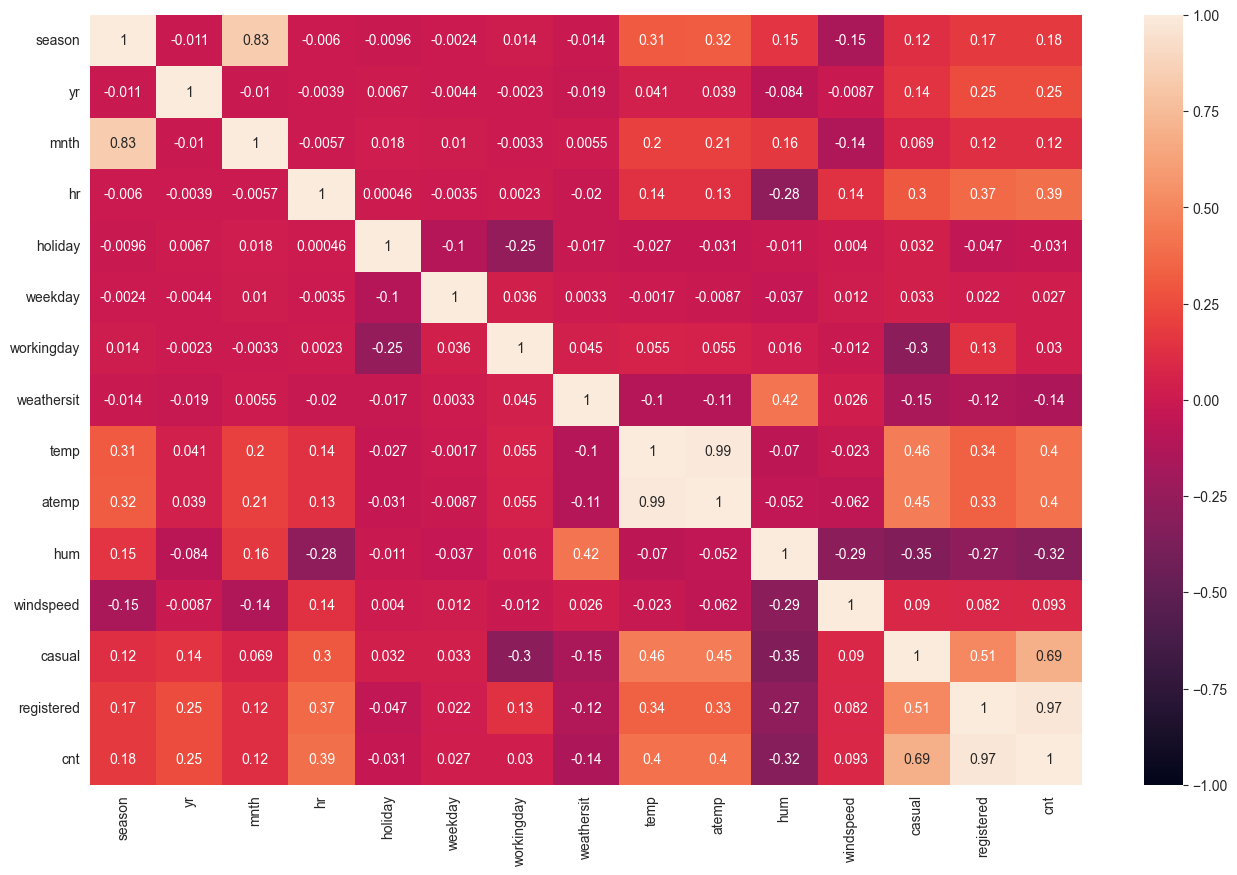

In [22]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_hour.corr(), vmin = -1, vmax = 1, annot=True)

## *3.1 Discussions*

### 3.1.1 How do holidays affect the total number of bicycle users (cnt)?

In [23]:
data_day.groupby(by='holiday').agg({'cnt': ['mean', 'count']})

cnt      
                mean count
holiday                   
0        4527.104225   710
1        3735.000000    21

1. The average number of bicycle users is higher on non-holiday days (4,397.76) compared to holidays (3,274.78).
2. The holiday data only includes 18 records, which is much fewer than non-holidays.

## 3.1.2 What is the average and distribution of the number of bicycle users (casual and registered) during peak hours (morning: 7–9, afternoon: 17–19)?

In [25]:
rush_hour = data_hour[(data_hour['hr'].between(7,9)) | (data_hour['hr'].between(17,19))]
rush_hour.agg({'casual': ['mean', 'count'], 'registered': ['mean', 'count']}).T


,mean,count
casual,41.327456,4367.0
registered,290.257385,4367.0


## 3.1.3 Do weather conditions (weathersit) affect the number of bicycle users (cnt)?

In [39]:
weather_analysis = data_hour.groupby(by='weathersit').agg({'cnt': ['mean', 'count']})
weather_analysis.columns = ['Average Users (cnt)', 'Total Records']
weather_analysis

,Average Users (cnt),Total Records
weathersit,,
1,204.903689,11411
2,175.165493,4544
3,111.579281,1419
4,74.333333,3


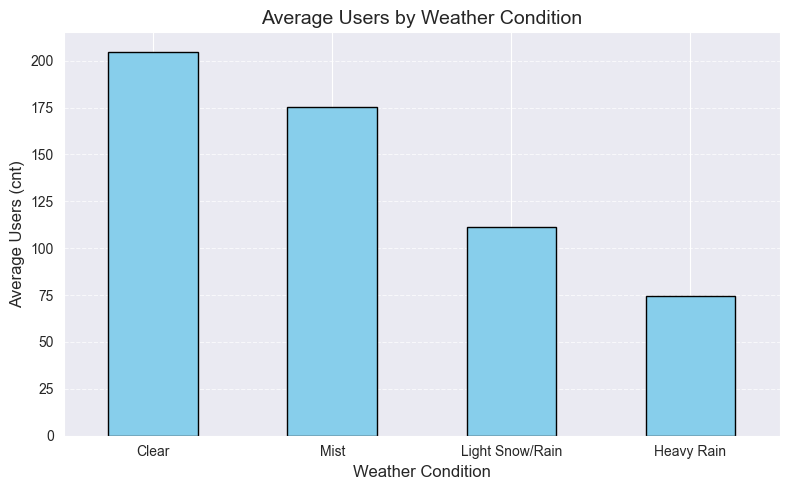

In [43]:
plt.figure(figsize=(8, 5))
weather_analysis['Average Users (cnt)'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Users by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Users (cnt)', fontsize=12)
plt.xticks(ticks=range(len(weather_analysis)), labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.1.4 How does bicycle use (cnt) compare between different seasons?

In [34]:
data_day.groupby(by='season').agg({'cnt': ['sum', 'count']})

cnt      
            sum count
season               
1        471348   181
2        918589   184
3       1061129   188
4        841613   178

In [35]:
compare_season = data_day.groupby(by='season')['cnt'].mean().reset_index()
compare_season.sort_values(by=['cnt'], ascending=False)

,season,cnt
2,3,5644.303191
1,2,4992.331522
3,4,4728.162921
0,1,2604.132597
